HOTEL REVIEWS CLASSIFICATION

In [ ]:
# links
# https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/


In [10]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [12]:
data = pd.read_csv("E:\\1 P36 PROJECT\\Original Datasets\\train (2).csv")

In [13]:
data.head(3)
data.tail(3)
# data.describe

ID                                             Review  Rating
0   0  exceptional service nice all-around daughter s...       5
1   1  beautiful relaxing jw marriott desert ridge re...       5
2   2  great location great location 5 mins subway ta...       5

ID                                             Review  Rating
14340  14340  great place relax know looking vacation book t...       4
14341  14341  better just got week seattle loved minute, pac...       3
14342  14342  stay clear, internet reservation friday rang h...       1

In [14]:
data.shape
data.columns

(14343, 3)

Index(['ID', 'Review', 'Rating'], dtype='object')

In [15]:
data.Rating.value_counts()
data.Rating.value_counts(normalize=True)*100

5    6436
4    4172
3    1510
2    1248
1     977
Name: Rating, dtype: int64

5    44.872063
4    29.087360
3    10.527784
2     8.701109
1     6.811685
Name: Rating, dtype: float64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14343 entries, 0 to 14342
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      14343 non-null  int64 
 1   Review  14343 non-null  object
 2   Rating  14343 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 336.3+ KB


In [17]:
data.isnull().sum()

ID        0
Review    0
Rating    0
dtype: int64

In [18]:
new_reviews = list(set(data.Review))
len(new_reviews)

14343

In [19]:
# finding length of the reviews
data['text length'] = data['Review'].apply(len)
data.head()

ID                                             Review  Rating  text length
0   0  exceptional service nice all-around daughter s...       5          937
1   1  beautiful relaxing jw marriott desert ridge re...       5          791
2   2  great location great location 5 mins subway ta...       5          473
3   3  pleased nice safe hotel, flower market hotel v...       3          342
4   4  excellent hotel service great hotel excellent ...       4          244

In [20]:
data['text length'].max() # the largest review has  13501 words
data['text length'].min() # min smallest has 44 words
# data.describe() # to find max and min of text length

13501

44

In [21]:
sum(data['text length'])
# there are 10,468,622 words in our dataset

10468622

In [7]:
# Libraries for text preprocessing
import re
import nltk

#nltk.download('stopwords')
from nltk.corpus import stopwords # import stopwords 

#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer # to lemmatize the words

from nltk.tokenize import RegexpTokenizer, word_tokenize # to tokenize sentences into words

TEXT NORMALIZATION
converting all letters to lower case
removing numbers
removing punctuations, accent marks and other diacritics
removing white spaces
removing stop words, sparse terms, and particular words


In [65]:
# TEXT NORMALIZATION   or PRE-PROCESSING

##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
# new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown","n","th","hotel","room"]
# stop_words = stop_words.union(new_words)

corpus = []
for index, row in data.iterrows():
    text = re.sub('[^a-zA-Z]', ' ', row['Review']) # Remove punctuations    
    text = text.lower() #Convert to lowercase
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)  # remove tags
    text = re.sub("(\\d|\\W)+"," ",text)  # remove special characters and digits
    text = text.split()  # Convert to list from string
    
    #Lemmatisation
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text if not word  in stop_words] 
    text_string = " ".join(text)
    data.at[index, 'clean_review'] = text_string
data[0:10]

ID                                             Review  Rating  \
0   0  exceptional service nice all-around daughter s...       5   
1   1  beautiful relaxing jw marriott desert ridge re...       5   
2   2  great location great location 5 mins subway ta...       5   
3   3  pleased nice safe hotel, flower market hotel v...       3   
4   4  excellent hotel service great hotel excellent ...       4   
5   5  beautiful beautiful beautiful, hotel just perf...       5   
6   6  not enought spend night business trip, 5 stars...       3   
7   7  great place, villa ixora good quiet location, ...       5   
8   8  march 14 28th 2007 wonderful relaxing vacation...       4   
9   9  fantastic value true gem stayed hotel husbands...       5   

                                        clean_review  
0  exceptional service nice around daughter staye...  
1  beautiful relaxing jw marriott desert ridge re...  
2  great location great location min subway take ...  
3  pleased nice safe hotel flower market hotel va...  
4  excellent hotel service great hotel excellent ...  
5  beautiful beautiful beautiful hotel perfect th...  
6  enought spend night business trip star hotel b...  
7  great place villa ixora good quiet location wa...  
8  march th wonderful relaxing vacation stayed ca...  
9  fantastic value true gem stayed hotel husband ...

In [25]:
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords # import stopwords 
from nltk.stem.porter import PorterStemmer # for stemming of words
from nltk.tokenize import RegexpTokenizer, word_tokenize # to tokenize sentences into words
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer # to lemmatixe the words
nltk.download('stopwords')
en_stopwords = stopwords.words('english')

##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
# new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown","n","th","hotel","room"]
# stop_words = stop_words.union(new_words)

corpus = []
for index, row in data.iterrows():
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', row['Review'])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text_string = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text_string = " ".join(text_string)
    data.at[index, 'clean_review'] = text_string


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
data[0:10]

ID                                             Review  Rating  text length  \
0   0  exceptional service nice all-around daughter s...       5          937   
1   1  beautiful relaxing jw marriott desert ridge re...       5          791   
2   2  great location great location 5 mins subway ta...       5          473   
3   3  pleased nice safe hotel, flower market hotel v...       3          342   
4   4  excellent hotel service great hotel excellent ...       4          244   
5   5  beautiful beautiful beautiful, hotel just perf...       5          182   
6   6  not enought spend night business trip, 5 stars...       3          239   
7   7  great place, villa ixora good quiet location, ...       5          665   
8   8  march 14 28th 2007 wonderful relaxing vacation...       4         1293   
9   9  fantastic value true gem stayed hotel husbands...       5          239   

                                        clean_review  
0  exceptional service nice around daughter staye...  
1  beautiful relaxing jw marriott desert ridge re...  
2  great location great location min subway take ...  
3  pleased nice safe hotel flower market hotel va...  
4  excellent hotel service great hotel excellent ...  
5  beautiful beautiful beautiful hotel perfect th...  
6  enought spend night business trip star hotel b...  
7  great place villa ixora good quiet location wa...  
8  march th wonderful relaxing vacation stayed ca...  
9  fantastic value true gem stayed hotel husband ...

In [35]:
clean_review_list = " ".join(data['clean_review'])
len(clean_review_list) # 963,1761 total letters
type(clean_review_list)

9631761

str

WORDCLOUD 

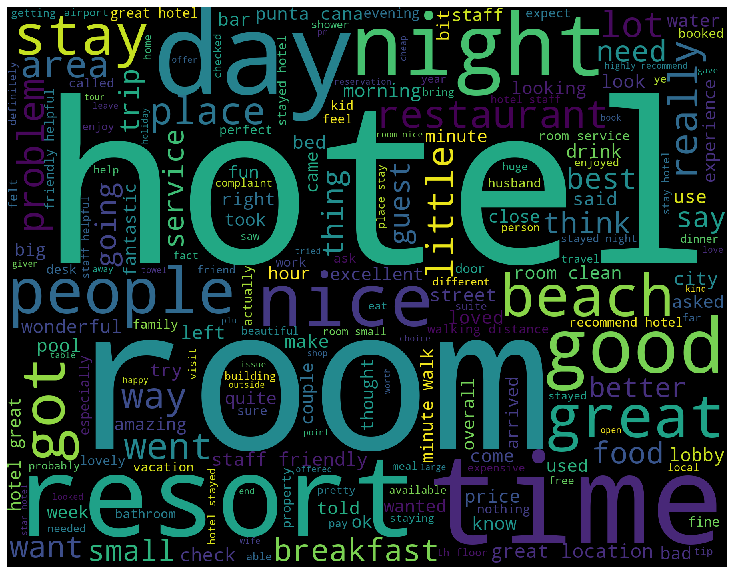

In [37]:
from wordcloud import WordCloud
wordcloud_all = WordCloud(background_color='black', width=1800, height=1400).generate(clean_review_list)
                      
# plot the WordCloud image                        
plt.figure(figsize = (10,10), facecolor = None) 
plt.imshow(wordcloud_all) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show();

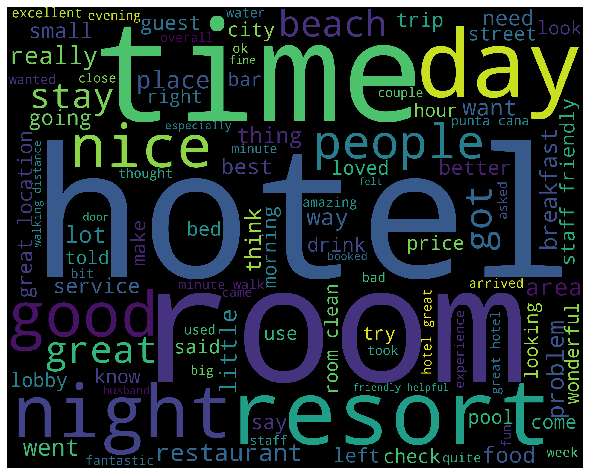

In [34]:
from wordcloud import WordCloud
wordcloud_all = WordCloud(background_color='black', width=2500, height=2000, max_words=100).generate(clean_review_list)
                      
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_all) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show();

In [ ]:
# find hotel and room are very frequent, need to remove them, also remove 'th'
new_words = ['hotel','room','restaurant','th']
for index, row in data.iterrows():
    text = 

In [38]:
##Creating a list of stop words and adding custom stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
new_words = ["n","th","hotel","room",'restaurant']
stop_words = stop_words.union(new_words)

for index, row in data.iterrows():
    text = re.sub('[^a-zA-Z]', ' ', row['Review'])    #Remove punctuations
    text = text.lower() #Convert to lowercase
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)   #remove tags
    text=re.sub("(\\d|\\W)+"," ",text) # remove special characters and digits
    text = text.split()  # Convert to list from string
    #Lemmatisation
    lem = WordNetLemmatizer()
    text_string = [lem.lemmatize(word) for word in text if not word in  stop_words] 
    text_string = " ".join(text_string)
    data.at[index, 'clean_review'] = text_string
 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
data[0:3]

ID                                             Review  Rating  text length  \
0   0  exceptional service nice all-around daughter s...       5          937   
1   1  beautiful relaxing jw marriott desert ridge re...       5          791   
2   2  great location great location 5 mins subway ta...       5          473   

                                        clean_review  
0  exceptional service nice around daughter staye...  
1  beautiful relaxing jw marriott desert ridge re...  
2  great location great location min subway take ...

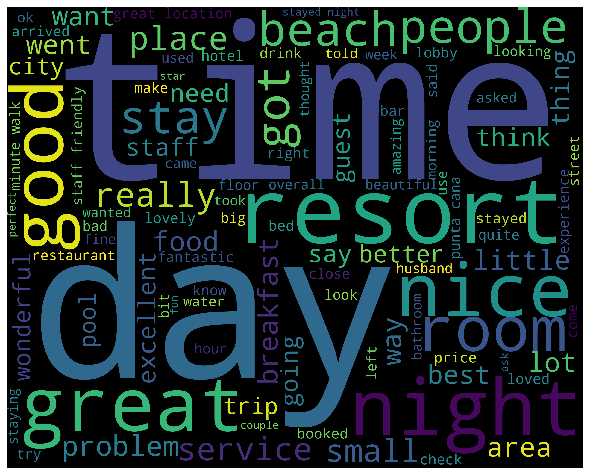

In [41]:
# Word cloud after removing the words - (hotel, room, restaurant)
clean_review_list = " ".join(data['clean_review'])
wordcloud_all = WordCloud(background_color='black', width=2500, height=2000, max_words=100).generate(clean_review_list)
                      
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_all) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show();

In [48]:
clean_review_list = " ".join(data['clean_review'])
clean_review_list = clean_review_list.split()
len(clean_review_list) # 1352172 letters
clean_review_list[0:10]


1352172

['exceptional',
 'service',
 'nice',
 'around',
 'daughter',
 'stayed',
 'well',
 'priced',
 'night',
 'king']

### Positive Word Cloud

In [42]:
# Using positive words 
with open('E:\\1 P36 PROJECT\\positive-words.txt','r') as pos:
    poswords = pos.read().split("\n")
poswords = poswords[35:]
poswords[0:6]

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable']

In [55]:
text_pos = " ".join([w for w in clean_review_list if w in poswords])
text_pos[0:10]

'exceptiona'

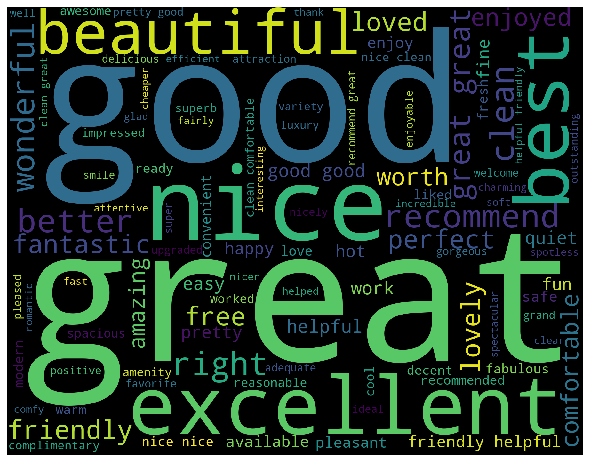

In [59]:
wordcloud_pos = WordCloud(background_color='black', width=1800, height=1400, max_words=100).generate(text_pos)
                      
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_pos) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show();


###  Negative Word Cloud

In [57]:
# Using Negative words

with open ('E:\\1 P36 PROJECT\\negative-words.txt','r') as neg:
    negwords = neg.read().split("\n")
negwords = negwords[35:]
negwords[0:6]

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably']

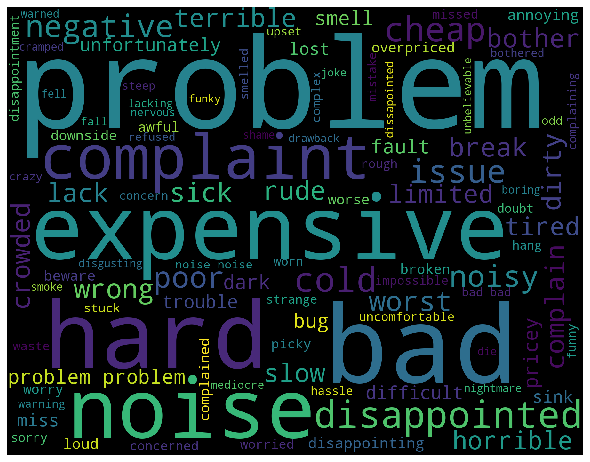

In [60]:
text_neg = " ".join ([w for w in clean_review_list if w in negwords])

wordcloud_neg = WordCloud(background_color='black', width=1800, height=1400, max_words=100).generate(text_neg)
                      
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_neg) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show();


In [64]:
type(text_neg)
# Unique words 
hotels_negative_words = list(set(" ".join(text_neg).split(" ")))
type(hotels_negative_words)
hotels_negative_words.sort

str

list

TypeError: count() takes exactly one argument (0 given)

In [65]:
from nltk.tokenize import word_tokenize
corpusdata=data['clean_review'].apply(word_tokenize).tolist()
len(corpusdata),data.shape[0]

(14343, 14343)

<Figure size 720x720 with 0 Axes>

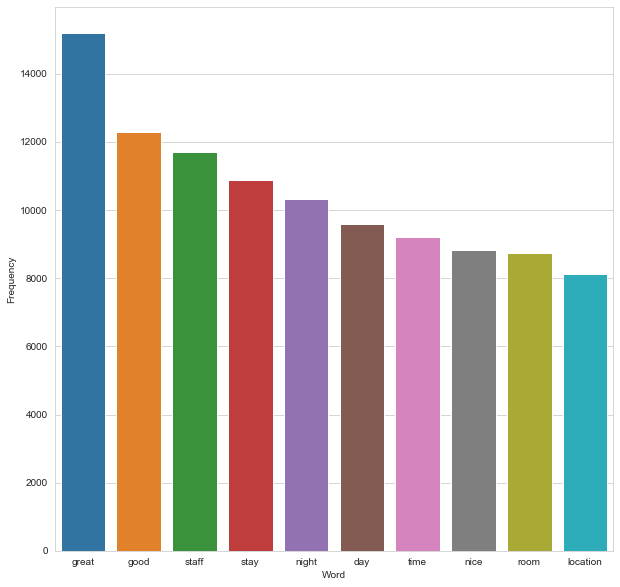

In [69]:
# Calculate frequency distribution

from collections import Counter
import seaborn as sns

top_N=10
word_dist = nltk.FreqDist(clean_review_list)
freq_data = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=freq_data.head(10))

## SENTIMENT ANALYSIS

In [ ]:
### Using Text Blob

<Figure size 720x720 with 0 Axes>

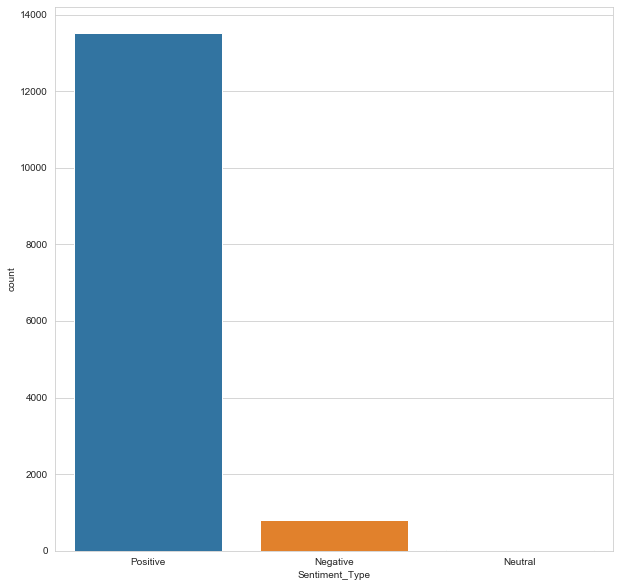

In [71]:
from textblob import TextBlob
# conda install -c conda-forge textblob
bloblist_desc = list()

data_clean_review_str=data['clean_review'].astype(str)
for row in data_clean_review_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    data_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(data_polarity_desc):
    if data_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif data_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

data_polarity_desc['Sentiment_Type'] = data_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=data_polarity_desc)

## sentiment analysis using Vader

In [ ]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
data["sentiments"] = data["Review"].apply(lambda x: sid.polarity_scores(x))

data = pd.concat([data.drop(['sentiments'], axis=1), data['sentiments'].apply(pd.Series)], axis=1)

data.head()

In [74]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
data["sentiments"] =data["Review"].apply(lambda x: sid.polarity_scores(x))

df = pd.concat([data.drop(['sentiments'], axis=1), data['sentiments'].apply(pd.Series)], axis=1)

df.head()

ID                                             Review  Rating  text length  \
0   0  exceptional service nice all-around daughter s...       5          937   
1   1  beautiful relaxing jw marriott desert ridge re...       5          791   
2   2  great location great location 5 mins subway ta...       5          473   
3   3  pleased nice safe hotel, flower market hotel v...       3          342   
4   4  excellent hotel service great hotel excellent ...       4          244   

                                        clean_review    neg    neu    pos  \
0  exceptional service nice around daughter staye...  0.046  0.691  0.263   
1  beautiful relaxing jw marriott desert ridge re...  0.046  0.493  0.461   
2  great location great location min subway take ...  0.083  0.557  0.361   
3  pleased nice safe flower market vast array res...  0.000  0.750  0.250   
4  excellent service great excellent location cou...  0.000  0.532  0.468   

   compound  
0    0.9877  
1    0.9970  
2    0.9808  
3    0.9281  
4    0.9718

In [75]:
# add number of characters columns
df["nb_chars"] = df["Review"].apply(lambda x: len(x))

# add number of words column
df["nb_words"] = df["Review"].apply(lambda x: len(x.split(" ")))

df.head()

ID                                             Review  Rating  text length  \
0   0  exceptional service nice all-around daughter s...       5          937   
1   1  beautiful relaxing jw marriott desert ridge re...       5          791   
2   2  great location great location 5 mins subway ta...       5          473   
3   3  pleased nice safe hotel, flower market hotel v...       3          342   
4   4  excellent hotel service great hotel excellent ...       4          244   

                                        clean_review    neg    neu    pos  \
0  exceptional service nice around daughter staye...  0.046  0.691  0.263   
1  beautiful relaxing jw marriott desert ridge re...  0.046  0.493  0.461   
2  great location great location min subway take ...  0.083  0.557  0.361   
3  pleased nice safe flower market vast array res...  0.000  0.750  0.250   
4  excellent service great excellent location cou...  0.000  0.532  0.468   

   compound  nb_chars  nb_words  
0    0.9877       937       134  
1    0.9970       791       108  
2    0.9808       473        73  
3    0.9281       342        51  
4    0.9718       244        33

In [76]:
# highest positive sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 5].sort_values("pos", ascending = False)[["Review", "pos"]].head(10)

Review    pos
12780  perfect, impressive place, want clean comfy ro...  0.818
13758  hotel great hotel great money clean good restu...  0.799
10169  regular, amazing value, stay hotel let, great ...  0.796
10350  fantastic value money good value money, great ...  0.792
1517   great hotel loved hotel, location perfect staf...  0.787
10518  incredible value great price expedia package, ...  0.777
4919   best hotel, hotel gorgeous, beautiful clean sp...  0.763
6643   fabulous trip stayed just night wish longer, h...  0.757
3057   wonderful hotel perfect place stay excellent l...  0.756
10634  location superb, rooms good size appointed sta...  0.753

In [81]:
# highest positive sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 5].sort_values("compound", ascending = False)[["Review", "pos","compound"]].head(10)

Review    pos  compound
7122   ocean blue excellent resort, boyfriend mid-20_...  0.324    0.9999
8469   melia caribe wonderful, just returned wonderfu...  0.244    0.9998
2629   great weather time secrets husband couple frie...  0.382    0.9998
1348   ca n't wait till year, 2nd 16th 2008we stayed ...  0.318    0.9998
8207   bravo bavaro knew not five-star hotel incredib...  0.234    0.9998
2801   ca n't wait, time dominican republic staying b...  0.277    0.9998
2454   superb, spent 2 weeks 13/03-27/03 hotel absolu...  0.340    0.9998
14170  perfect days paradise, waited home write guest...  0.232    0.9997
4359   absolutely perfect way, excellence excellente,...  0.410    0.9997
4166   6/1/06 6/7/06 great time n't, ok think importa...  0.243    0.9997

In [77]:
# lowest negative sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 5].sort_values("neg", ascending = False)[["Review", "neg"]].head(10)

Review    neg
7808   bad hotel really awful place dirty room rude s...  0.646
13106  bad bad bad hotel verry bad pls not stay, clos...  0.645
6908   worn noisy worn noisy, remodel future, prices ...  0.527
12728  extremely disappointing experience disappointi...  0.507
10332  worst hotel room awful no windows poor lightin...  0.477
5671   eh, no didnt like room hotel super small does ...  0.461
9660   warwick bad good reviews warwick shocks staff ...  0.458
2677   food great rest service poor stayed hotel time...  0.440
12565  horrible stay bad staff rooms horrible staff u...  0.438
9486   ritz canal street terrible location equally ho...  0.438

In [80]:
# lowest negative sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 5].sort_values("compound", ascending = True)[["Review", 'neg',"compound"]].head(10)

Review    neg  compound
1669   414 hotel worst accomodation experience life, ...  0.180   -0.9974
5160   dreams nightmares husband second time resort, ...  0.315   -0.9941
6722   great vomiting pass june 16 june 23 family lef...  0.187   -0.9932
10819  majestic hotel putan cana-awful assuming peopl...  0.275   -0.9923
6000   ok not great told excellence punta cana best e...  0.232   -0.9912
6759   traveler beware worse hotel not all-inclusive ...  0.186   -0.9911
6197   horrible experience terrible service experienc...  0.268   -0.9897
14266  gross problems hotel, town wedding just wanted...  0.302   -0.9894
9883   worst jw marriott stayed, 1st glance jw marrio...  0.181   -0.9892
12366  ok just returned staying 7 days ocean blue inc...  0.212   -0.9889

# Named Entity Recognition / Entity Extraction

In [84]:
import spacy
nlp = spacy.load('en_core_web_sm')

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

Let’s find out the most frequent named entities in our corpus. For this, we will build a data frame consisting of all the named entities and their types.

In [ ]:
named_entities = []
for sentence in corpus:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(sentence)
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])

To find top occuring entities and their types

In [ ]:
# get the top named entities
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:20]

Here, we can see that it has correctly identified spanish, italian, american as nationalities. We can also see that night is mostly used.

In [ ]:
# get the top named entity types
top_entities = (entity_frame.groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

Here we can see organisation, person, and country/cities/states are the most mentioned entities